# Deep Learning Fraud Classifier - Overview

This project focuses on building a fraud detection tool using a machine learning pipeline to identify potentially fraudulent financial transactions. The goal is to develop an end-to-end system capable of processing raw transaction data, exploring and analyzing patterns, engineering meaningful features, training predictive models, and evaluating their performance — all while following a structured data science methodology.

Financial fraud poses a serious challenge for institutions, and detecting anomalous behavior in vast amounts of data requires a combination of domain understanding, statistical analysis, and algorithmic intelligence. This project applies those principles to build a practical detection system, leveraging both exploratory and predictive techniques.

# Pipeline Summary 

The pipeline was developed in a single, cohesive Jupyter notebook and follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. Here's an overview of each stage:

1. Business Understanding
- Defined the objective: detect fraud with high recall (true positive rate) and a reasonably low false positive rate.
- Considered practical constraints such as class imbalance and real-time detection requirements.

2. Data Understanding
- Loaded the dataset (not included in the repo due to large size).
- Performed initial exploration to understand class distribution, identify missing values, and inspect feature types.
- Visualized key patterns and anomalies using plots (e.g., transaction amounts, correlations).

3. Data Preparation and Preprocessing
- Handled missing values and cleaned the dataset through transformation and feature selection.
- Conducted feature engineering: created new time-based features, encoded categorical data, scaled numerical attributes.
- Addressed class imbalance using sampling techniques.

4. Modeling
- Created and trained a deep learning model
- Evaluate models using appropriate metrics (Precision, Recall, F1-score, ROC-AUC) with a focus on fraud detection sensitivity.
- Tuned hyperparameters according to the performance metrics 

5. Evaluation
- Compared models and interpreted their performance.
- Visualized confusion matrices and feature importance to understand model behavior.
  
6. Deployment Consideration
- Outlined how the model could be integrated into a live system.
- Discussed limitations and next steps (e.g., explainability using SHAP, improving precision, alert systems).

# Step One: Business Understanding
Imagine if you were in charge of a digital bank, once praised for speed and ease of use, found itself in trouble. Customers were noticing unauthorised transactions, charges they never made, slipping through undetected. Frustration turned into complaints, complaints turned into headlines, and soon the bank faced regulatory pressure and loss of public trust.

Realising the situation could no longer be managed with an outdated rule-based systems, the bank made a strategic decision: it needed a smarter fraud detection tool.

The objective was clear; detect fraud early, accurately, and with minimal disruption to real users. The bank assessed its position; historical transaction data was available, but fraud cases were rare and unpredictable. The team set a data science goal: build a robust machine learning model that could identify suspicious patterns, even in a sea of normal activity.

A plan took shape:

- Explore the data to understand user behavior and uncover trends (this step).
- Prepare the data by cleaning, transforming, and balancing it.
- Train predictive models using techniques that prioritize high recall without over-alerting.
- Evaluate results and lay the groundwork for real-time deployment.

This is where the pipeline begins: understanding the data behind the problem.

# Step 2: Data Understanding

The transaction dataset I've used for this pipeline comes from Kaggle. Here is the link to the dataset: https://www.kaggle.com/code/kartik2khandelwal/predicting-fraudulent-transactions/notebook

Like any other machine learning pipeline, understanding the dataset was crucial before building a model. This step focused on identifying the structure of the data, the most informative features, and any patterns that could separate fraudulent from legitimate transactions.

**Summary Statistics**

I began by examing the shape and stucture of the dataset:

- Counted rows and columns to understand scale
- Identified categorical and numerical features for tailored analysis

This helped determine which features could be directly analyzed and which might require transformation or encoding later.

**Correlation with Target** 

To find features with predictive value, I computed the Pearson correlation between each numerical feature and isFraud. This gave a quick measure of how strongly each feature related to fraud likelihood. 

**Visual Exploration**

I used these visualiaations to better understand distribution and separation among the features:

- Histograms: Revealed feature ranges, skewness, and potential outliers.
- Boxplots (strip plots) showed how each feature varied across fraud vs. non-fraud classes — useful for spotting patterns not obvious in raw stats.

These plots confirmed which features showed distinct fraud-related behavior, guiding both feature selection and preprocessing decisions in the next stage.

This quick but targeted EDA provided a foundation for data preparation and model training, ensuring decisions were backed by evidence and not assumptions.


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

data = pd.read_csv("Fraud.csv")  # Importing the dataset into a dataframe

# Summary Statistics

def summary_stats(data):
    print("\n--- Summary Statistics ---")
    n_rows, n_cols = data.shape
    print(f"Number of rows (instances): {n_rows}")
    print(f"Number of columns (features): {n_cols}")

    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print(f"Number of numerical features: {len(numerical_features)}")
    print(f"Number of categorical features: {len(categorical_features)}")
    print(f"Numerical features: {numerical_features}")
    print(f"Categorical features: {categorical_features}")

    return numerical_features, categorical_features

# Correlation with Target ('isFraud')

def correlation_with_target(data, numerical_features):
    print("\n--- Correlation with 'isFraud' ---")
    target_col = 'isFraud'
    if target_col not in data.columns:
        raise ValueError(f" Target column '{target_col}' not found!")
    
    # Compute Pearson correlation for numerical features
    correlations = {}
    for col in numerical_features:
        if col != target_col:
            # Drop NaNs for correlation computation
            valid_rows = data[[col, target_col]].dropna()
            if not valid_rows.empty:
                corr, _ = pearsonr(valid_rows[col], valid_rows[target_col])
                correlations[col] = abs(corr)
    
    return correlations, target_col

# Top 3 features by absolute correlation

def top3(correlations):
    top3_features = sorted(correlations, key=correlations.get, reverse=True)[:3]
    print("Top 3 features most correlated with 'isFraud':")
    for feature in top3_features:
        print(f"{feature}: {correlations[feature]:.4f}")

# Plotting Histograms
def plot_histograms(data):
    print("\n--- Plotting Histograms ---")
    data.hist(figsize=(12, 10), edgecolor = 'black')
    plt.tight_layout()
    plt.show()

# Plotting Boxplot
def plot_box(data, numerical_features, target):
    print("\n--- Plotting Boxplots ---")
    for feature in numerical_features:
        plt.figure(figsize=(4, 3)) 
        sns.stripplot(data, x=target, y=feature, alpha=0.7, size=4)
        plt.title(f'Box Plot of {feature} by {target}')
        plt.xlabel(target)
        plt.ylabel(feature)
        plt.show()


--- Summary Statistics ---
Number of rows (instances): 6362620
Number of columns (features): 11
Number of numerical features: 8
Number of categorical features: 3
Numerical features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
Categorical features: ['type', 'nameOrig', 'nameDest']

--- Correlation with 'isFraud' ---
Top 3 features most correlated with 'isFraud':
amount: 0.0767
isFlaggedFraud: 0.0441
step: 0.0316

--- Plotting Histograms ---


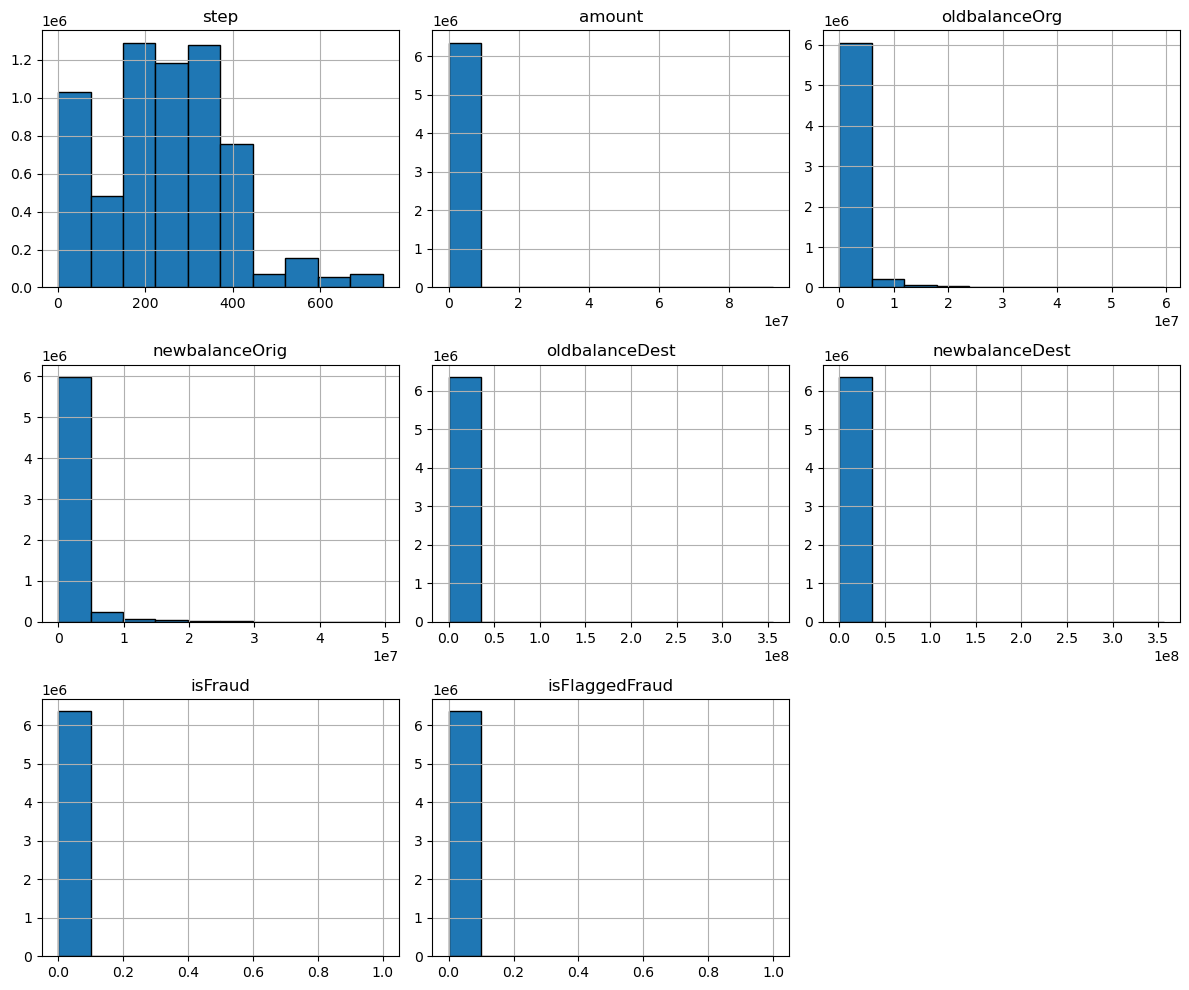


--- Plotting Boxplots ---


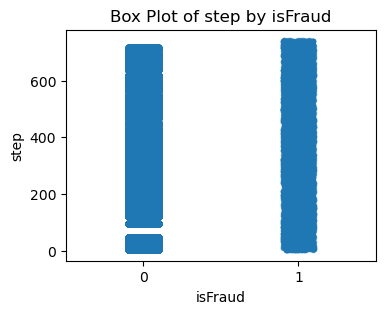

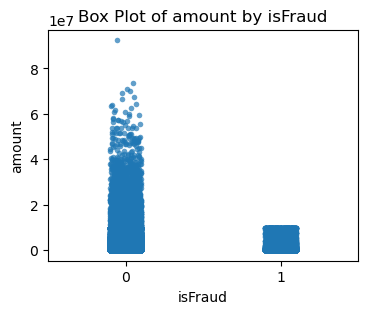

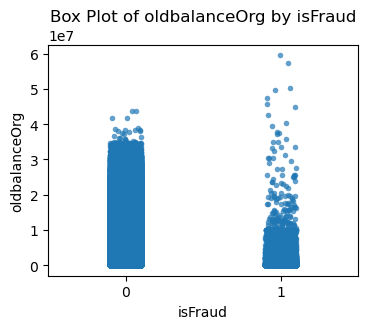

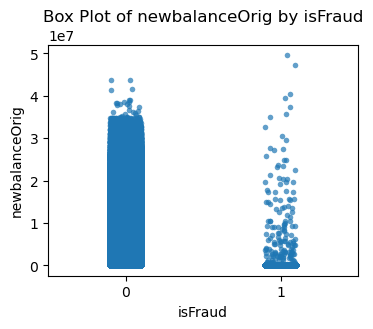

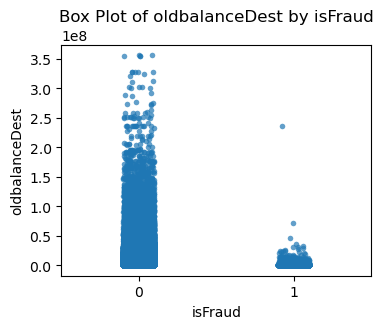

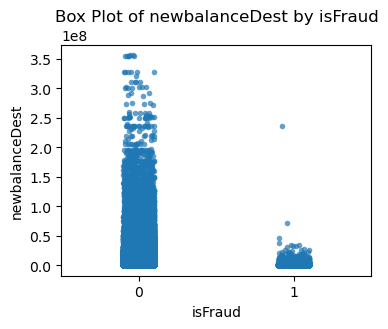

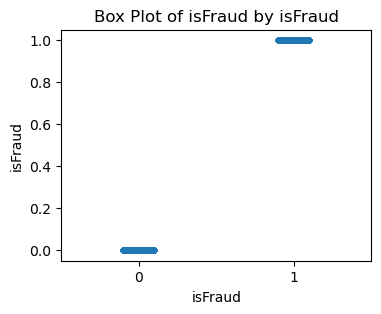

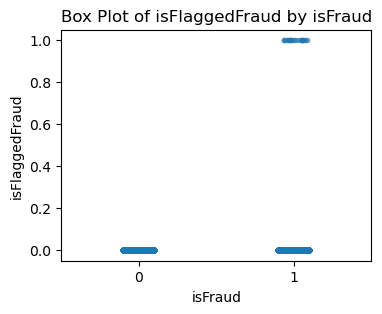

In [15]:
numerical_features, categorical_features = summary_stats(data)
correlations, target = correlation_with_target(data, numerical_features)
top3(correlations)
plot_histograms(data)
plot_box(data, numerical_features, target)

# Step 3: Data Preparation

With key patterns identified during EDA, I moved into data preparation. This stage is where raw inputs are cleaned, transformed, and engineered to support effective model training.

**Dual Dataset Strategy**

To address the severe class imbalance in fraud detection, I prepared two datasets:

1. Full dataset: preserves the real-world imbalance.
2. Sampled dataset: balances the classes (fraud vs. non-fraud) to help models learn minority class patterns more effectively (customisable).

This dual approach allows for:

* Robust model evaluation (real-world test on the imbalanced dataset).
* Better training performance on the rare fraud class using the balanced sample.

**Handling Missing Values**

Although the dataset contained no missing values, I verified this step to ensure data integrity, hence there are no imputations needed to be performed. 

**Feature Engineering**

To provide the model with more signal, I created two new features:

* differenceOrg = change in origin account balance
* differenceDest = change in destination account balance

These capture transaction effects more directly than raw balance values.

**Adaptive Numerical Feature Transformation**

To prepare the numerical features for training, I implemented an adaptive transformation strategy based on the skewness and distribution of each feature. The goal was to normalize skewed distributions and standardize the data for better model performance, especially in neural networks.

* Skewness Analysis: Each numerical feature's skewness was computed to determine if transformation was necessary.
* Log1p Transformation: For features with heavy right skew and strictly positive values, a logarithmic transformation (log1p) was applied. This helps compress large values and reduce skew.
* Yeo-Johnson Transformation: For features with negative values or that didn't meet the criteria for log1p, the Yeo-Johnson transformation was applied. This transformation supports both positive and negative values and is effective at reducing skew and normalizing distributions.

**Sampling the Dataset**

To effectively address class imbalance while controlling dataset size, I implemented a stratified sampling method that allows flexible adjustment of both the fraud-to-nonfraud ratio and the overall dataset size relative to the original data.

Specifically:

* A fraud ratio parameter lets me set the desired proportion of fraud cases in the sample (e.g. 2%).
* A sample size ratio parameter controls the total size of the sampled dataset as a fraction of the original dataset (e.g. 50% of all transactions).
* The function then downsamples both fraud and non-fraud classes accordingly to maintain the requested ratio and size.
* This ensures the training data is both manageable in size and realistic in distribution, improving model learning without overwhelming resources.

This flexible sampling approach enables tuning the dataset composition to match changing business priorities and computational constraints.

**Encoding & Feature Selection**

Final steps included:

* One-hot encoding of categorical features (e.g. transaction type)
* Dropping unrelated or redundant features to reduce noise

**EDA Revisited**

After preprocessing, I re-ran EDA on both the full and sampled datasets to confirm:

* Distributions were normalized
* Class separability improved 
* Engineered features added meaningful variation

This completed the preparation phase and ensured both datasets were ready for modeling.

In [44]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
# Missing Values

def handle_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    if missing_counts.empty:
        print("No missing values found!")
    else:
        for col, count in missing_counts.items():
            percent = 100 * count / len(df)
            print(f"{col}: {count} missing values ({percent:.2f}%)")
            print(f"Total missing values: {missing_counts.sum()}")
            
    return df

# Feature Construction

def feature_construct(df):
    df['differenceOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
    df['differenceDest'] = df['newbalanceDest'] - df['oldbalanceDest']
    print("New features successfully constructed")

    return df

# Transform numerical features with Yeo-Johnson Transformation

def adaptive_transform(df, skew_threshold, log1p_pos_threshold):
    pt = PowerTransformer(method='yeo-johnson', standardize = True)
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    
    if 'isFraud' in numerical_features:
         numerical_features.remove('isFraud')
        
    for feature in numerical_features:
        feature_data = df[feature].dropna()
        feature_skew = skew(feature_data)

        if abs(feature_skew) < skew_threshold:
            # No transformation needed
            print(f"No transformation needed for {feature} (skew={feature_skew:.2f})")
            continue
       
        positive_ratio = (df[feature] > 0).sum() / len(df[feature]) 
        
        if feature_skew > skew_threshold and positive_ratio >= log1p_pos_threshold:
            df[feature] = np.log1p(df[feature])
            print(f"Applied log1p to {feature} (skew={feature_skew:.2f}, positive_ratio={positive_ratio:.2f})")
        else:
            # Yeo-Johnson for general skew, including negatives
            pt = PowerTransformer(method='yeo-johnson', standardize=False)
            df[[feature]] = pt.fit_transform(df[[feature]])
            print(f"Applied Yeo-Johnson to {feature} (skew={feature_skew:.2f}, positive_ratio={positive_ratio:.2f})")

    print("Adaptive transformation successfully applied to numerical features.")
    return df

# Creating sample size

def create_sample_size(df, fraud_ratio, sample_ratio):
    total_sample_size = int(len(df) * sample_ratio)

    # Calculate number of fraud and non-fraud samples to draw
    n_fraud = int(total_sample_size * fraud_ratio)
    n_nonfraud = total_sample_size - n_fraud

    # Subset classes
    class1 = df[df['isFraud'] == 1]
    class0 = df[df['isFraud'] == 0]

    # Cap sample sizes at available data size
    n_fraud = min(n_fraud, len(class1))
    n_nonfraud = min(n_nonfraud, len(class0))

    # Sample from each class
    sample1 = class1.sample(n=n_fraud, random_state=42, replace=False)
    sample0 = class0.sample(n=n_nonfraud, random_state=42, replace=False)

    # Combine and shuffle
    sampled_df = pd.concat([sample1, sample0])
    sampled_df = shuffle(sampled_df, random_state=42).reset_index(drop=True)

    # Print info
    print(f"Sampled dataset size: {len(sampled_df)} (target was {total_sample_size})")
    print(f"Fraud ratio in sample: {sampled_df['isFraud'].mean():.4f}")

    return sampled_df

def encode_drop(df, cat_features, irrel_features):
    # Dropping unrelated features
    for feature in irrel_features: 
        df = df.drop([feature], axis = 1)
    
    # One-hot encode nominal cat features
    for feature in cat_features:
        df = pd.get_dummies(df, columns=[feature], drop_first=True)
    print("Encoding and dropping successful")
    
    return df

In [45]:
dataset1 = data

# Preprocess the raw data with a sample size
dataset1 = handle_missing_values(dataset1)
dataset1 = feature_construct(dataset1)
dataset1 = adaptive_transform(dataset1, skew_threshold = 0.70, log1p_pos_threshold = 0.9)
dataset1 = encode_drop(dataset1, ['type'], ['isFlaggedFraud', 'nameOrig', 'nameDest'])
dataset1 = create_sample_size(dataset1, fraud_ratio=0.02, sample_ratio=0.1)

No missing values found!
New features successfully constructed
No transformation needed for step (skew=0.38)
Applied log1p to amount (skew=30.99, positive_ratio=1.00)
Applied Yeo-Johnson to oldbalanceOrg (skew=5.25, positive_ratio=0.67)
Applied Yeo-Johnson to newbalanceOrig (skew=5.18, positive_ratio=0.43)
Applied Yeo-Johnson to oldbalanceDest (skew=19.92, positive_ratio=0.57)
Applied Yeo-Johnson to newbalanceDest (skew=19.35, positive_ratio=0.62)
Applied Yeo-Johnson to isFlaggedFraud (skew=630.60, positive_ratio=0.00)
Applied Yeo-Johnson to differenceOrg (skew=24.63, positive_ratio=0.45)
Applied Yeo-Johnson to differenceDest (skew=32.92, positive_ratio=0.44)
Adaptive transformation successfully applied to numerical features.
Encoding and dropping successful
Sampled dataset size: 631750 (target was 636262)
Fraud ratio in sample: 0.0130


In [18]:
#Preprocess second dataframe without a sample size
dataset2 = data

dataset2 = handle_missing_values(dataset2)
dataset2 = feature_construct(dataset2)
dataset2 = adaptive_transform(dataset2, skew_threshold = 0.7, log1p_pos_threshold = 0.9)
dataset2 = encode_drop(data, ['type'], ['isFlaggedFraud', 'nameOrig', 'nameDest'])

No missing values found!
New features successfully constructed
No transformation needed for step (skew=0.38)
Applied log1p to amount (skew=30.99, positive_ratio=1.00)
Applied Yeo-Johnson to oldbalanceOrg (skew=5.25, positive_ratio=0.67)
Applied Yeo-Johnson to newbalanceOrig (skew=5.18, positive_ratio=0.43)
Applied Yeo-Johnson to oldbalanceDest (skew=19.92, positive_ratio=0.57)
Applied Yeo-Johnson to newbalanceDest (skew=19.35, positive_ratio=0.62)
Applied Yeo-Johnson to isFlaggedFraud (skew=630.60, positive_ratio=0.00)
Applied Yeo-Johnson to differenceOrg (skew=24.63, positive_ratio=0.45)
Applied Yeo-Johnson to differenceDest (skew=32.92, positive_ratio=0.44)
Adaptive transformation successfully applied to numerical features.
Encoding and dropping successful



--- Summary Statistics ---
Number of rows (instances): 631750
Number of columns (features): 13
Number of numerical features: 9
Number of categorical features: 4
Numerical features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'differenceOrg', 'differenceDest']
Categorical features: ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

--- Correlation with 'isFraud' ---
Top 3 features most correlated with 'isFraud':
differenceOrg: 0.4934
amount: 0.1271
oldbalanceOrg: 0.1121

--- Plotting Histograms ---


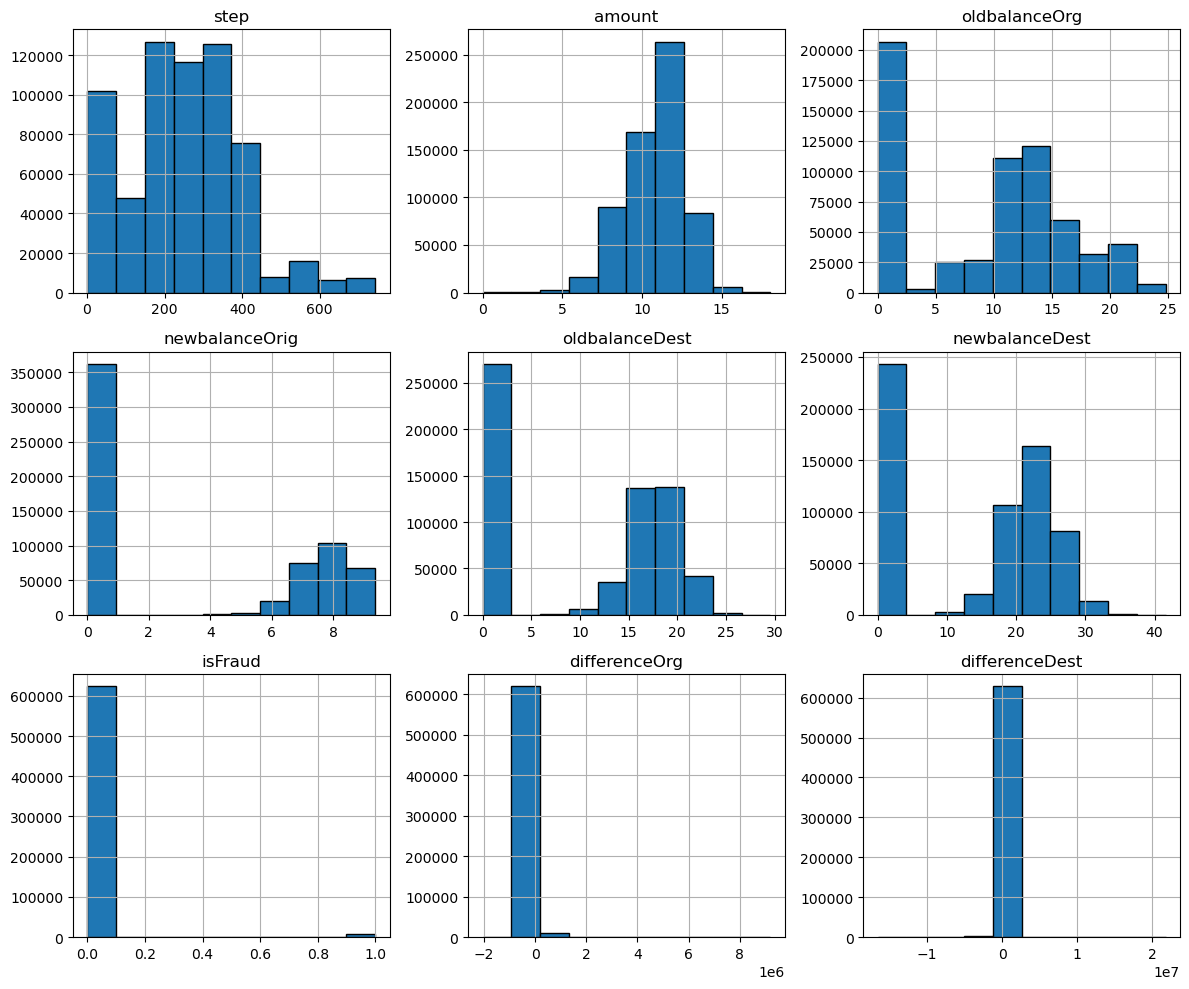


--- Plotting Boxplots ---


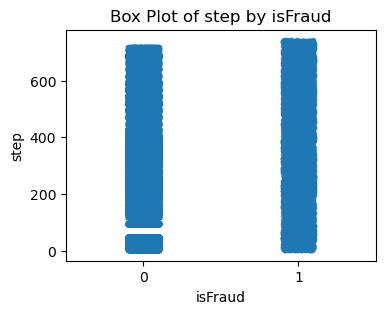

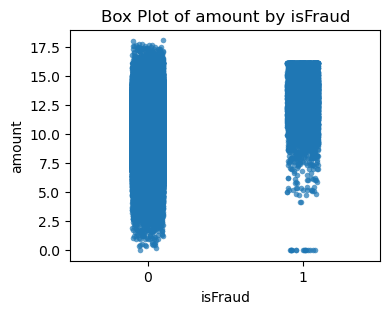

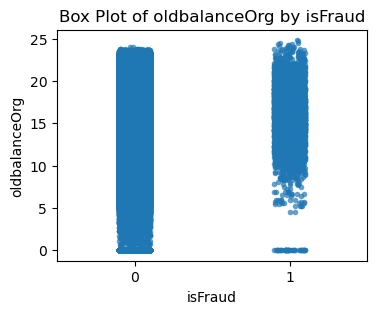

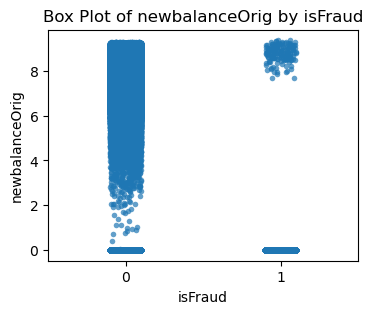

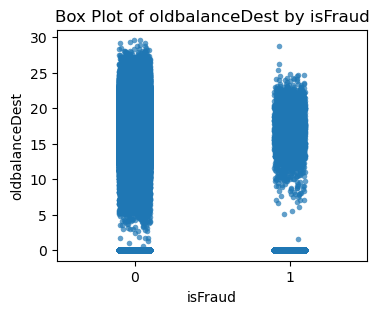

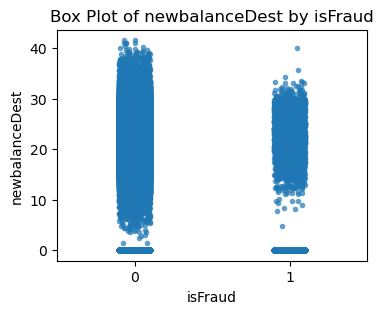

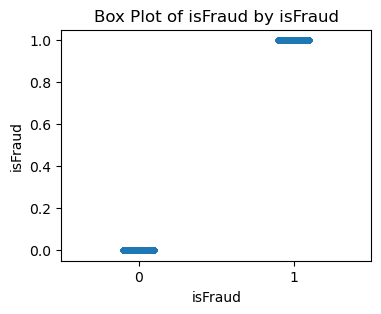

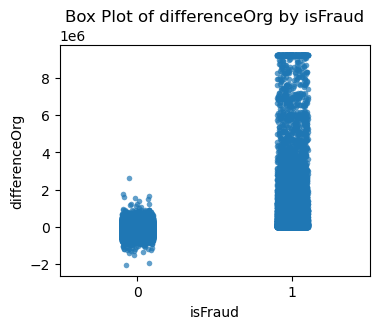

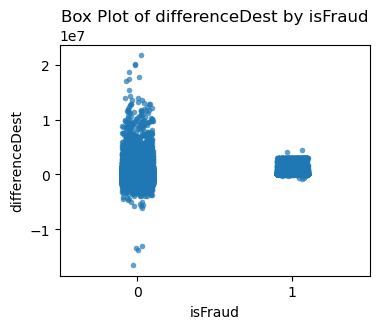

In [15]:
# Perform EDA on the preprocessed data with sampling

new_numerical_features1, new_categorical_features1 = summary_stats(dataset1)
new_correlations1, target1 = correlation_with_target(dataset1, new_numerical_features1)
top3(new_correlations1)
plot_histograms(dataset1)
plot_box(dataset1, new_numerical_features1, target1)


--- Summary Statistics ---
Number of rows (instances): 6362620
Number of columns (features): 13
Number of numerical features: 9
Number of categorical features: 4
Numerical features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'differenceOrg', 'differenceDest']
Categorical features: ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

--- Correlation with 'isFraud' ---
Top 3 features most correlated with 'isFraud':
differenceOrg: 0.3413
amount: 0.0406
oldbalanceOrg: 0.0356

--- Plotting Histograms ---


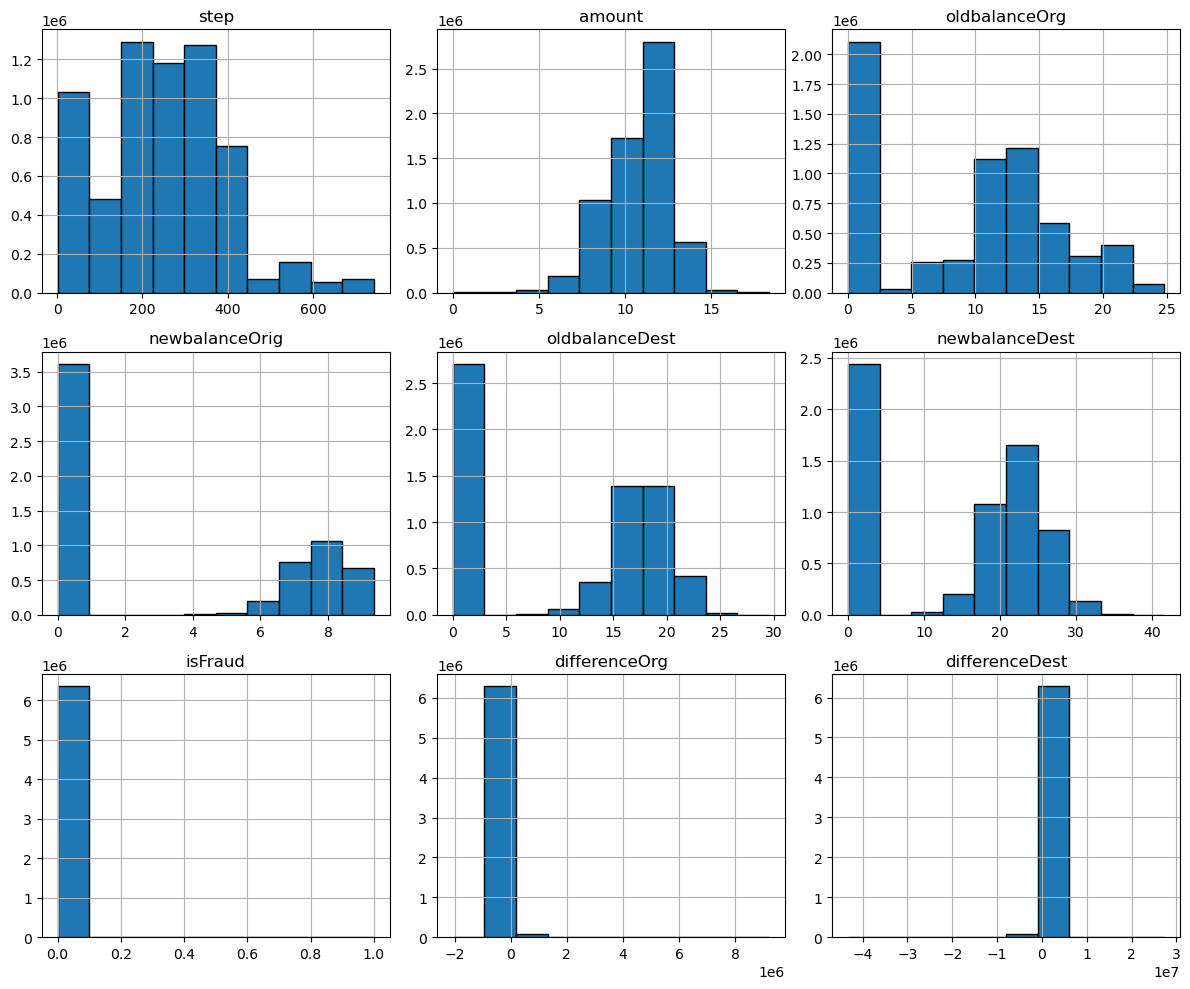


--- Plotting Boxplots ---


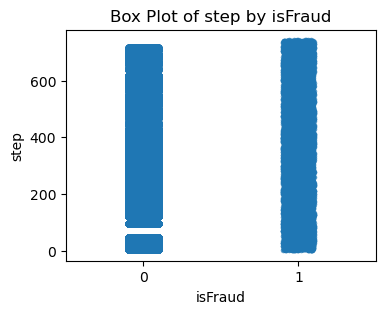

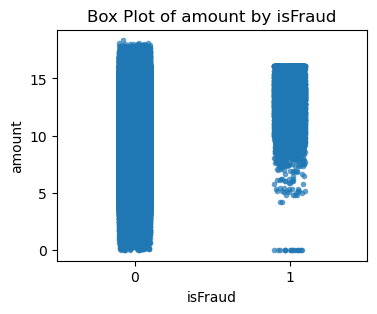

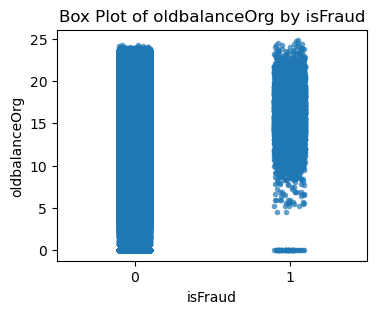

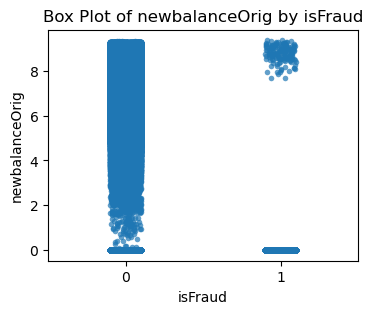

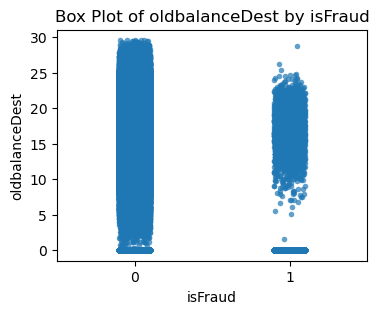

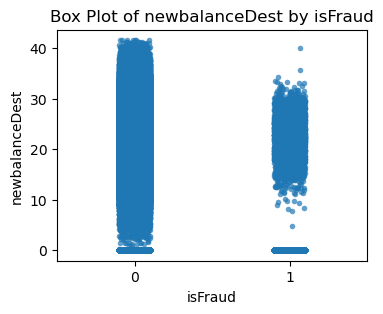

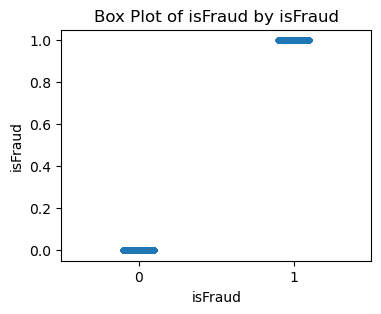

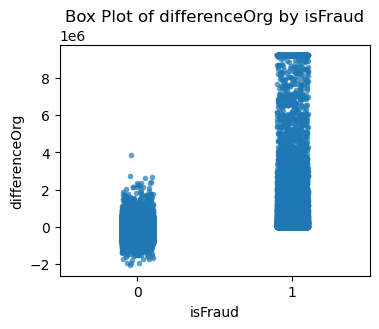

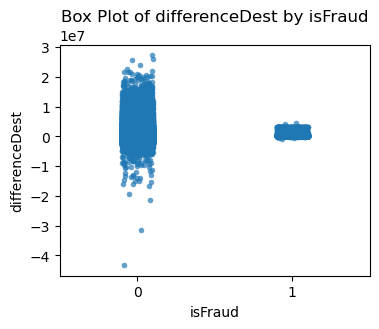

In [19]:
# Perform EDA on the imbalanced sample size

new_numerical_features2, new_categorical_features2 = summary_stats(dataset2)
new_correlations2, target2 = correlation_with_target(dataset2, new_numerical_features2)
top3(new_correlations2)
plot_histograms(dataset2)
plot_box(dataset2, new_numerical_features2, target2)

# Step 4: Modelling

With the two datasets prepared and insights gathered, the next step was to train models capable of accurately classifying transactions as fraudulent or legitimate.

**Baseline: Logistic Regression**

To establish a benchmark, I first implemented a logistic regression model. This simple model helped:

* Set a performance baseline
* Provide a sanity check before training complex models.
* Highlight the limitations of linear decision boundaries in fraud detection.

**Neural Network Architecture**

To better capture nonlinear relationships in the data, I developed a custom feedforward neural network with the following structure:

1. Input layer: 12 neurons for input features
2. Hidden Layers:
   * Layer 1: 36 neurons with Relu
   * Layer 2: 48 neurons with Leaky Relu
   * Layer 3: 28 neurons with Relu
3. Ouptut layer: 1 neuron with Sigmoid for binary classification

This architecture balances depth and flexibility without excessive complexity, enough to model nuanced fraud patterns without overfitting.

**Training Strategy**

* Loss Function: BCEWithLogitsLoss with pos_weight to compensate for class imbalance, putting more emphasis on correctly classifying more fraudulent cases as possible.
* Optimizer: Adam (lr = 0.001) for efficient convergence.
* Device: Model is trained on GPU if available for faster execution.
* Batch Size: Defined through a PyTorch DataLoader for efficient mini-batch training.
* Epochs: Trained over multiple epochs to optimize generalization without overfitting.
* Threshold Tuning: A classification threshold is applied to sigmoid outputs to improve precision/recall trade-offs.

**Accuarcy Evaluation**

After training, I evaluated the model on the test set using a custom threshold:

* Predictions are passed through a sigmoid and compared to the threshold.
* Accuracy is calculated, but further analysis uses precision, recall, and F1 (covered in the Evaluation phase).



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

def create_sets(df):
    X = df.drop(columns=['isFraud'])
    y = df['isFraud']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalise features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Convert to tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
    y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)
    
    print(X_train.shape)
    print(y_train.shape)

    return X_train, y_train, X_test, y_test

def create_loaders(df, batch_size):

    X_train, y_train, X_test, y_test = create_sets(df)
    
    # Create datasets
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    
    # Create data loaders (shuffle training set)
    train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)
    test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

    return train_loader, test_loader


In [23]:
sampled_training, sampled_test = create_loaders(dataset1, batch_size = 256)

torch.Size([505400, 12])
torch.Size([505400])


In [21]:
unsampled_training, unsampled_test = create_loaders(dataset2, batch_size = 2048)

torch.Size([5090096, 12])
torch.Size([5090096])


In [24]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def train_logistic_regression(df):
    # Use the preprocessing logic from the create_sets function
    X_train, y_train, X_test, y_test = create_sets(df)
    
    # Convert torch tensors to NumPy arrays for sklearn
    X_train_np = X_train.numpy()
    y_train_np = y_train.numpy()
    X_test_np = X_test.numpy()
    y_test_np = y_test.numpy()

    # Initialize and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_np, y_train_np)

    # Predictions
    y_pred = model.predict(X_test_np)

    # Evaluation
    acc = accuracy_score(y_test_np, y_pred)
    precision = precision_score(y_test_np, y_pred)
    recall = recall_score(y_test_np, y_pred)
    f1 = f1_score(y_test_np, y_pred, zero_division = 1)
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test_np, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud']) 
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Print the results of each metric
    print(f"\nTest Accuracy: {acc:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return model


torch.Size([505400, 12])
torch.Size([505400])


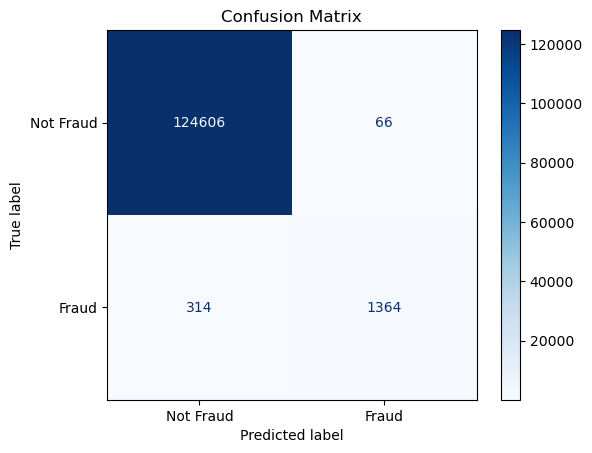


Test Accuracy: 0.9970
Test Precision: 0.9538
Test Recall: 0.8129
F1 Score: 0.8777


In [25]:
log_reg_model1 = train_logistic_regression(dataset1)

torch.Size([5090096, 12])
torch.Size([5090096])


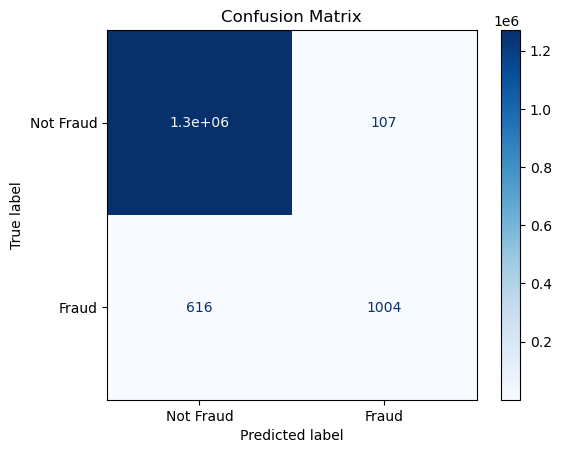


Test Accuracy: 0.9994
Test Precision: 0.9037
Test Recall: 0.6198
F1 Score: 0.7353


In [26]:
log_reg_model2 = train_logistic_regression(dataset2)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FraudClassifier(nn.Module):
    def __init__(self, input_size, output_size, hidden1_size, hidden2_size, hidden3_size):
        super(FraudClassifier, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden1_size) # Input to first hidden layer
        self.fc2 = torch.nn.Linear(hidden1_size, hidden2_size) # First layer to second layer
        self.fc3 = torch.nn.Linear(hidden2_size, hidden3_size) # First layer to second layer
        self.fc4 = torch.nn.Linear(hidden3_size, output_size) # hidden to output

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x) # Apply ReLU activiation to the hidden layers
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x.view(-1)

In [28]:
from tqdm import tqdm

# Method for training the nn model for nth times based on the number of epochs specified 
def train_neural_network(model, train_loader, loss_function, optimizer, device, threshold, epochs):
    # lists to store the loss and accuracy of each epoch
    loss_history = []
    accuracy_history = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # loop through each epoch
    for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
        model.train() # Train the model
        running_loss = 0.0 # Accumulate loss over each epoch
        correct = 0 # Count of correct prediction
        total = 0 # Total number of samples seen

        # Iterate over batches from the training data loader
        for batch_x, batch_y in train_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device).view(-1)
            optimizer.zero_grad() # Reset gradients
            logits = model(batch_x).view(-1) # Forward Pass
            loss = loss_function(logits, batch_y) # Compute loss
            loss.backward() # Backpropagation
            optimizer.step() # Update weights

            running_loss += loss.item() * batch_x.size(0) # Accumulate weighted batch loss
            preds = (torch.sigmoid(logits) >= threshold).float() # Get predicted classes
            correct += (preds == batch_y).sum().item() # Count correct predictions
            total += batch_y.size(0) # Update total samples

        # Compute average loss and accuracy for the epoch
        epoch_loss = running_loss / total
        epoch_accuracy = correct / total
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)

        print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

    return model


In [29]:
from torch import nn, optim
import matplotlib.pyplot as plt
import torch

def perform(df, train_loader, test_loader, pos_weight, threshold, epochs):

    # Define model, loss function, and optimizer
    # Instantiate model, loss, and optimizer
    model = FraudClassifier(input_size=12, hidden1_size=36, hidden2_size = 48, hidden3_size = 28, output_size=1)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Compute pos_weight as a Tensor
    pos_weight_tensor = torch.tensor([pos_weight], dtype=torch.float).to(device)
    
    # Define the weighted loss
    loss_function = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
    
    # Train
    fraud_nn = train_neural_network(
        model,
        train_loader,
        loss_function,
        optimizer,
        device,
        threshold,
        epochs
    )
    
    # Evaluate on test set
    fraud_nn.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for xb, yb in test_loader:
            yb = yb.float()
            outputs = fraud_nn(xb)
            predicted = (torch.sigmoid(outputs) >= threshold).float()
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
    
    test_accuracy = correct / total * 100
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    return model

In [30]:
pos_weight1 = 8.5
threshold1 = 0.3
epochs1 = 20

nn_model_one = perform(dataset1, sampled_training, sampled_test, pos_weight = pos_weight1, threshold = threshold1, epochs = epochs1)

Training:   5%|▌         | 1/20 [00:09<03:00,  9.52s/epoch]

Epoch 1: Loss = 0.0494, Accuracy = 0.9804


Training:  10%|█         | 2/20 [00:18<02:45,  9.20s/epoch]

Epoch 2: Loss = 0.0232, Accuracy = 0.9929


Training:  15%|█▌        | 3/20 [00:27<02:33,  9.03s/epoch]

Epoch 3: Loss = 0.0197, Accuracy = 0.9942


Training:  20%|██        | 4/20 [00:36<02:24,  9.02s/epoch]

Epoch 4: Loss = 0.0175, Accuracy = 0.9949


Training:  25%|██▌       | 5/20 [00:46<02:18,  9.26s/epoch]

Epoch 5: Loss = 0.0160, Accuracy = 0.9953


Training:  30%|███       | 6/20 [00:54<02:08,  9.15s/epoch]

Epoch 6: Loss = 0.0152, Accuracy = 0.9956


Training:  35%|███▌      | 7/20 [01:03<01:58,  9.08s/epoch]

Epoch 7: Loss = 0.0145, Accuracy = 0.9959


Training:  40%|████      | 8/20 [01:12<01:45,  8.78s/epoch]

Epoch 8: Loss = 0.0133, Accuracy = 0.9962


Training:  45%|████▌     | 9/20 [01:20<01:37,  8.83s/epoch]

Epoch 9: Loss = 0.0135, Accuracy = 0.9961


Training:  50%|█████     | 10/20 [01:29<01:27,  8.76s/epoch]

Epoch 10: Loss = 0.0126, Accuracy = 0.9963


Training:  55%|█████▌    | 11/20 [01:38<01:19,  8.85s/epoch]

Epoch 11: Loss = 0.0123, Accuracy = 0.9966


Training:  60%|██████    | 12/20 [01:47<01:09,  8.75s/epoch]

Epoch 12: Loss = 0.0122, Accuracy = 0.9965


Training:  65%|██████▌   | 13/20 [01:56<01:01,  8.83s/epoch]

Epoch 13: Loss = 0.0117, Accuracy = 0.9966


Training:  70%|███████   | 14/20 [02:05<00:53,  8.91s/epoch]

Epoch 14: Loss = 0.0116, Accuracy = 0.9966


Training:  75%|███████▌  | 15/20 [02:13<00:43,  8.72s/epoch]

Epoch 15: Loss = 0.0113, Accuracy = 0.9968


Training:  80%|████████  | 16/20 [02:22<00:35,  8.88s/epoch]

Epoch 16: Loss = 0.0112, Accuracy = 0.9968


Training:  85%|████████▌ | 17/20 [02:31<00:26,  8.80s/epoch]

Epoch 17: Loss = 0.0114, Accuracy = 0.9967


Training:  90%|█████████ | 18/20 [02:40<00:17,  8.90s/epoch]

Epoch 18: Loss = 0.0108, Accuracy = 0.9970


Training:  95%|█████████▌| 19/20 [02:48<00:08,  8.68s/epoch]

Epoch 19: Loss = 0.0108, Accuracy = 0.9969


Training: 100%|██████████| 20/20 [02:57<00:00,  8.88s/epoch]

Epoch 20: Loss = 0.0106, Accuracy = 0.9970


Test Accuracy: 99.73%


In [38]:
pos_weight2 = 6
threshold2 = 0.3
epochs2 = 15

nn_model_two = perform(dataset2, unsampled_training, unsampled_test, pos_weight = pos_weight2, threshold = threshold2, epochs = epochs2)

Training:   7%|▋         | 1/15 [01:27<20:27, 87.68s/epoch]

Epoch 1: Loss = 0.0187, Accuracy = 0.9838


Training:  13%|█▎        | 2/15 [02:54<18:49, 86.91s/epoch]

Epoch 2: Loss = 0.0046, Accuracy = 0.9991


Training:  20%|██        | 3/15 [04:18<17:11, 85.97s/epoch]

Epoch 3: Loss = 0.0039, Accuracy = 0.9990


Training:  27%|██▋       | 4/15 [05:43<15:41, 85.60s/epoch]

Epoch 4: Loss = 0.0034, Accuracy = 0.9990


Training:  33%|███▎      | 5/15 [07:06<14:06, 84.65s/epoch]

Epoch 5: Loss = 0.0031, Accuracy = 0.9990


Training:  40%|████      | 6/15 [08:29<12:36, 84.00s/epoch]

Epoch 6: Loss = 0.0029, Accuracy = 0.9990


Training:  47%|████▋     | 7/15 [09:57<11:22, 85.27s/epoch]

Epoch 7: Loss = 0.0029, Accuracy = 0.9990


Training:  53%|█████▎    | 8/15 [11:22<09:57, 85.30s/epoch]

Epoch 8: Loss = 0.0028, Accuracy = 0.9991


Training:  60%|██████    | 9/15 [12:49<08:33, 85.62s/epoch]

Epoch 9: Loss = 0.0027, Accuracy = 0.9991


Training:  67%|██████▋   | 10/15 [14:11<07:02, 84.45s/epoch]

Epoch 10: Loss = 0.0027, Accuracy = 0.9991


Training:  73%|███████▎  | 11/15 [15:33<05:35, 83.84s/epoch]

Epoch 11: Loss = 0.0027, Accuracy = 0.9991


Training:  80%|████████  | 12/15 [16:58<04:12, 84.18s/epoch]

Epoch 12: Loss = 0.0026, Accuracy = 0.9991


Training:  87%|████████▋ | 13/15 [18:17<02:45, 82.66s/epoch]

Epoch 13: Loss = 0.0025, Accuracy = 0.9991


Training:  93%|█████████▎| 14/15 [19:40<01:22, 82.62s/epoch]

Epoch 14: Loss = 0.0025, Accuracy = 0.9992


Training: 100%|██████████| 15/15 [20:59<00:00, 83.95s/epoch]

Epoch 15: Loss = 0.0025, Accuracy = 0.9991


Test Accuracy: 99.95%


# Step 5: Model Evaluation

After training, it was essential to objectively measure how well the model performs, especially given the imbalanced nature of fraud detection. The evaluation phase focuses on key metrics that reflect the model’s ability to catch fraud without flagging too many false positives.

**Evaluation Process**

Using the test set, I evaluated the model with a custom classification threshold to control the trade-off between precision and recall. Predictions were passed through a sigmoid function and compared to the threshold to produce binary outputs.

**Metrics Used**

To get a comprehensive view of performance, I calculated the following:

* Accuracy: The overall correctness of the model's prediction
* Precision: The proportion of correctly identified True Positives out of all those that were predicted as fraud
* Recall: The proportion of True Positives out of all the actual fraud cases (This one mattered the most)
* F1-Score: The harmonic balance between precision and recall

**Confusion Matrix**

A confusion matrix was plotted to visualize the number of:

* True Positives (correct fraud detections)
* True Negatives (correct legitimate detections)
* False Positives (legitimate wrongly flagged)
* False Negatives (fraud detected as legitimate)

**Precision-Recall_Curve**

I also plotted the precision-recall curve to evaluate how performance changes across thresholds. This is more informative than ROC-AUC in cases of class imbalance, as it focuses on the positive (fraud) class.

This curve helps identify the optimal threshold to balance high fraud detection (recall) with minimising false alarms (precision).

**How does it compare to the Logistic Regression models?**

After extensive tuning of the two models with different dataset inputs, this evaluation confirmed that the neural network model, trained with a weighted loss and tuned threshold, outperformed the logistic regression baseline, especially in fraud recall and F1-score. Therefore, neural networks are better suited for real-world deployment where catching fraud is critical.

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, data_loader, device, threshold):
    model.eval()  # Set the model to evaluation mode
    all_predictions = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            labesl = labels.view(-1)
            outputs = model(inputs).view(-1)

            probs = torch.sigmoid(outputs)    # probabilities between 0 and 1
            predictions = (probs >= threshold).float()  # Apply threshold on probs

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert lists to NumPy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    cm = confusion_matrix(all_labels, all_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud']) 
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, zero_division = 1)
    recall = recall_score(all_labels, all_predictions, zero_division=1)
    f1 = f1_score(all_labels, all_predictions, zero_division=1)

    # Compute precision-recall pairs for different thresholds
    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_predictions)
    
    # Plot the curve
    plt.figure(figsize=(8,6))
    plt.plot(recalls, precisions, marker='.', label='Fraud Model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "Test Accuracy": accuracy,
        "Test Precision": precision,
        "Test Recall": recall,
        "Test F1_score": f1,
    }


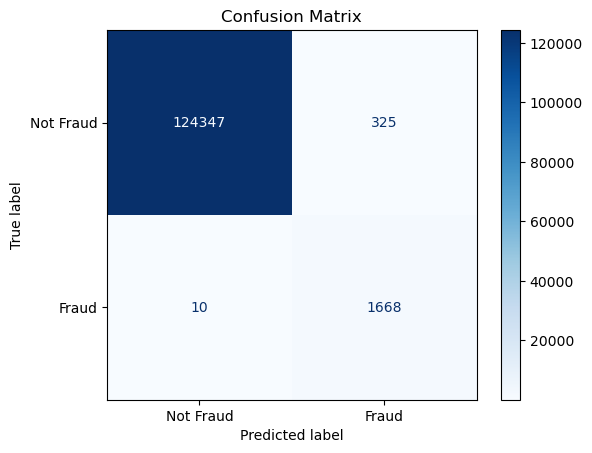

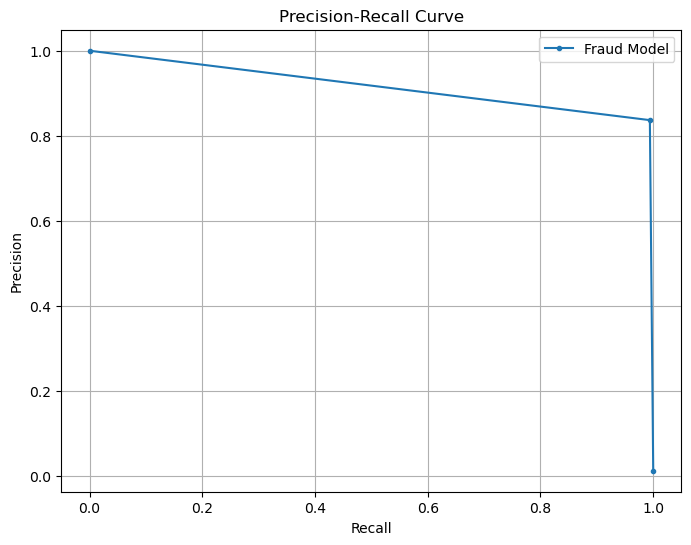

--- Model Evaluation ---
Test Accuracy: 0.9973
Test Precision: 0.8369
Test Recall: 0.9940
Test F1_score: 0.9087


In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nn_model_one.to(device) # Move the model to the device

evaluation_results = evaluate_model(nn_model_one, sampled_test, device, threshold1)
print("--- Model Evaluation ---")
for k, v in evaluation_results.items():
    print(f"{k}: {v:.4f}")

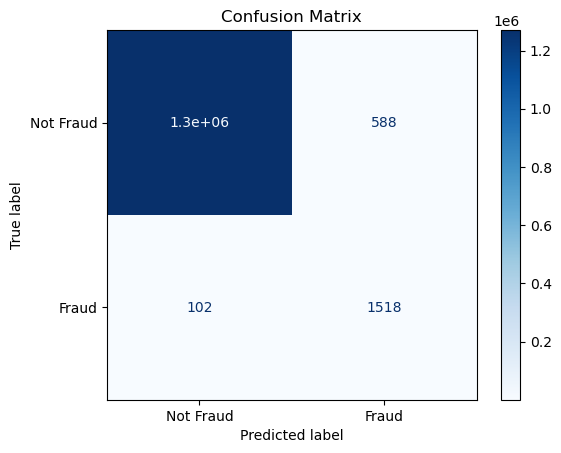

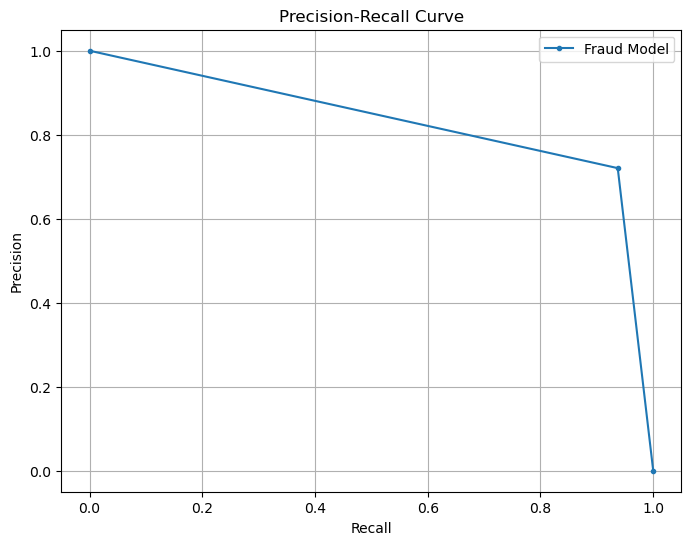

--- Model Evaluation ---
Test Accuracy: 0.9995
Test Precision: 0.7208
Test Recall: 0.9370
Test F1_score: 0.8148


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nn_model_two.to(device) # Move the model to the device

evaluation_results = evaluate_model(nn_model_two, unsampled_test, device, threshold2)
print("--- Model Evaluation ---")
for k, v in evaluation_results.items():
    print(f"{k}: {v:.4f}")